#  决策树

- ID3（基于信息增益）
- C4.5（基于信息增益比）
- CART（gini指数）

#### entropy：$H(x) = -\sum_{i=1}^{n}p_i\log{p_i}$

#### conditional entropy: $H(X|Y)=\sum{P(X|Y)}\log{P(X|Y)}$

#### information gain : $g(D, A)=H(D)-H(D|A)$

#### information gain ratio: $g_R(D, A) = \frac{g(D,A)}{H(A)}$

#### gini index:$Gini(D)=\sum_{k=1}^{K}p_k\log{p_k}=1-\sum_{k=1}^{K}p_k^2$

## 决策树学习的三个步骤
### 特征选择
### 决策树生成
### 决策树的修剪（防止过拟合）

Overfitting is common since individual pixels can be a terminal node
 Classification trees can have hundreds or thousands of nodes and these need to be reduced by pruning to simplify the tree
 Pruning involves removing nodes to simplify the
tree  Parameters such as minimum node size, and
maximum standard deviation of samples at a node can restrict tree size 

## 如何求熵？

In [ ]:
import numpy as np

def entropy(rows: list) -> float:
    """
    计算列表的熵
    """
    assert len(rows)   # 数组长度不能为0
    # 开始计算熵值
    ent = 0.0
    for p in rows:
        ent -= p * np.log2(p)
    return ent

In [ ]:
print(entropy([0, 6/6]))

In [ ]:
print(entropy([1/6,5/6]))

print(entropy([2/6,4/6]))

print(entropy([3/6,3/6]))

In [3]:
entropy([0.125,0.875])

0.5435644431995964

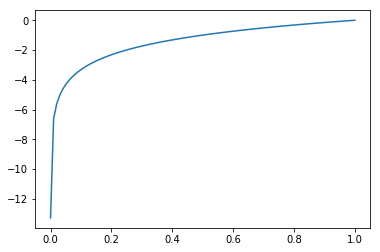

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.0001, 1, 100)

y = np.log2(x)

plt.plot(x,y )
plt.show()

In [7]:
import numpy as np

def entropy(rows: list) -> float:
    
    # 开始计算熵值
    ent = 0.0
    p = np.array(rows)
    logp = np.log2(p)
    ent = -logp.dot(p)
    return ent

In [8]:
print(entropy([3/6,3/6]))
print(entropy([2/6,4/6]))
print(entropy([np.finfo(np.float).eps, 6/6]))

1.0
0.9182958340544896
1.1546319456101628e-14


## 利用Scipy求熵

In [10]:
#C0：6，C1：4
import scipy.stats as st
#The logarithmic base to use, defaults to e (natural logarithm).，以2位底

print (st.entropy([1,3],base=2))

0.8112781244591328


In [11]:
 4/20 * st.entropy([1,3],base=2)
+8/20 * st.entropy([8,0],base=2)
+8/20 * st.entropy([1,7],base=2)

0.21742577727983858

## 分类标准的比较

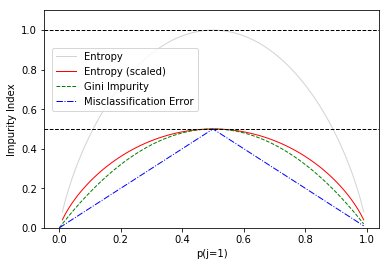

In [12]:
import matplotlib.pyplot as plt
import numpy as np

#仅仅针对二分类而言设计的函数
def gini(p):
   return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

def entropy(p):
   return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def classification_error(p):
   return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)
#此处if...else主要起赋值作用，
# 当data中的数据满足if条件时将其做exp1处理，否则按照exp2处理，最后统一生成为一个
# 数据列表
ent = [entropy(p) if p != 0 else None for p in x]
scaled_ent = [e*0.5 if e else None for e in ent]
c_err = [classification_error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)

for j, lab, ls, c, in zip(
      [ent, scaled_ent, gini(x), c_err],
      ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'],
      ['-', '-', '--', '-.'],
      ['lightgray', 'red', 'green', 'blue']):
   line = ax.plot(x, j, label=lab, linestyle=ls, lw=1, color=c)

ax.legend(loc='upper left', bbox_to_anchor=(0.01, 0.85),
         ncol=1, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')

plt.ylim([0, 1.1])
plt.xlabel('p(j=1)')
plt.ylabel('Impurity Index')
plt.show()

## 以iris数据结合为例

In [4]:
import pandas as pd
iris_data = pd.read_csv("iris.csv")

In [5]:
iris_data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
iris_data = pd.read_csv("iris.csv", header = None)
iris_data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#添加列的名称
iris_data.columns = ['spal_length_cm',
                     'spal_width_cm',
                     'petal_length_cm',
                     'petal_width_cm',
                     'species']
iris_data.tail()

,spal_length_cm,spal_width_cm,petal_length_cm,petal_width_cm,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [17]:
iris_data.describe()

,spal_length_cm,spal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#利用seaborn画图
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
#df = sb.load_dataset('iris')
sb.set_style("ticks")
sb.pairplot(iris_data.dropna() ,hue = 'species',
            diag_kind = "kde",kind = "scatter",
            palette = "husl")
plt.show()

<Figure size 1143.38x1000 with 20 Axes>

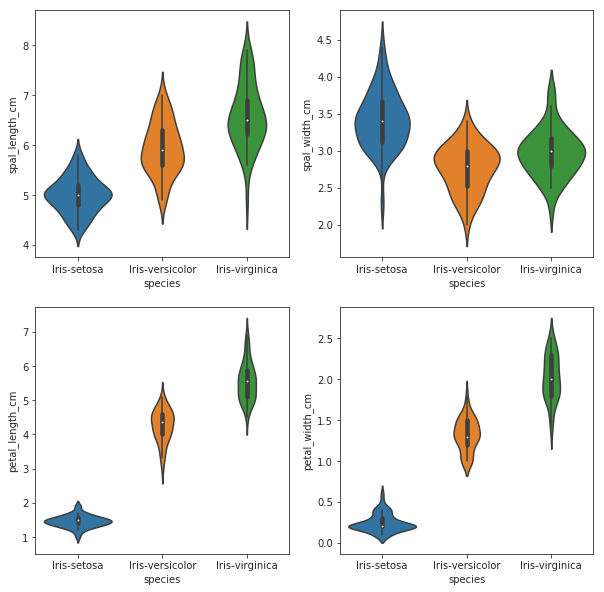

In [9]:
plt.figure(figsize=(10,10))
for column_index, column in enumerate (iris_data.columns):
    if column =='species':
        continue
    plt.subplot(2,2, column_index + 1)
    sb.violinplot(x = 'species', y = column, data = iris_data)

In [10]:
iris_data.columns

Index(['spal_length_cm', 'spal_width_cm', 'petal_length_cm', 'petal_width_cm',
       'species'],
      dtype='object')

In [11]:
from sklearn.model_selection import train_test_split
X = iris_data.iloc[:,2:4]
Y = iris_data.iloc[:,-1]
X_train,X_test,  Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [12]:
from sklearn.tree import DecisionTreeClassifier

## sklearn.tree.DecisionTreeClassifier

### criterion : string, optional (default=”gini”)
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

In [13]:
tree_clf = DecisionTreeClassifier(max_depth=2)

In [14]:
tree_clf.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
!pip3 install graphviz 

  Using cached https://files.pythonhosted.org/packages/1f/e2/ef2581b5b86625657afd32030f90cf2717456c1d2b711ba074bf007c0f1a/graphviz-0.10.1-py2.py3-none-any.whl
You are using pip version 8.1.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [48]:
!source /etc/profile

/bin/sh: 1: source: not found


In [15]:
import graphviz
from sklearn.tree import export_graphviz


In [16]:
tree_clf.score(X_test, Y_test)

0.9777777777777777

In [17]:
tree_pic = export_graphviz(tree_clf, out_file="mytree.graph")
with open('mytree.graph') as f:
    dot_graph = f.read()

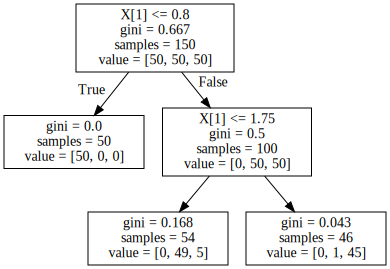

In [18]:
graphviz.Source(dot_graph)